## Template para uso de framework (scikit-learn)
En términos generales, debemos seguir los siguientes pasos:
1. Importar módulos
2. Cargar datos
3. Separar datos en subconjuntos
4. Entrenar el modelo
5. Analizar su desempeño
6. Usar el modelo para nuevas estimaciones (datos no vistos)


In [10]:
# Importar módulos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [7]:
# Cargar datos
import sklearn.model_selection


datos = pd.read_csv('Valhalla23 copy.csv')

X = datos[['Celsius']]
Y = datos['Valks']

# Separar datos en subconjuntos (usando train_test_split)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state= 42)

In [12]:
# Entrenar el modelo
# --- Crear objeto del modelo

model = sklearn.linear_model.SGDRegressor(penalty= None, max_iter= 10000000, eta0 = 1e-5, tol = 1e-6)

# --- Usar método fit para ajustar el modelo a los datos de entrenamiento
model.fit(x_train, y_train)

SGDRegressor(eta0=1e-05, max_iter=10000000, penalty=None, tol=1e-06)

Parámetros seleccionados: 

- Penalty: None, para tener el gradiente decendente sin regularización
- eta0 = 1e-5, se utiliza este learning rate ya que con uno más grande no se encuentra convergencia
- tol = 1e-6, se utiliza esta tolerancia para encontrar una buena solución
- max_iter = 1000000, para asegurar encontrar convergencia, con menos iteraciones es probable que no se encuentre

In [13]:
# Calcular el rendimiento del modelo
y_train_pred = model.predict(x_train)
print('R2 training set:', r2_score(y_train, y_train_pred))
print('MSE training set', mean_squared_error(y_train,y_train_pred))

R2 training set: 0.9905638722121132
MSE training set 70.36862108929398


In [18]:
# Usar el modelo para nuevas estimaciones (datos no vistos), usando método predict

y_test_pred = model.predict(x_test)
print('R2 test set:', r2_score(y_test, y_test_pred))
print('MSE test set', mean_squared_error(y_test,y_test_pred))

R2 test set: 0.9941437279019452
MSE test set 47.11074725254021


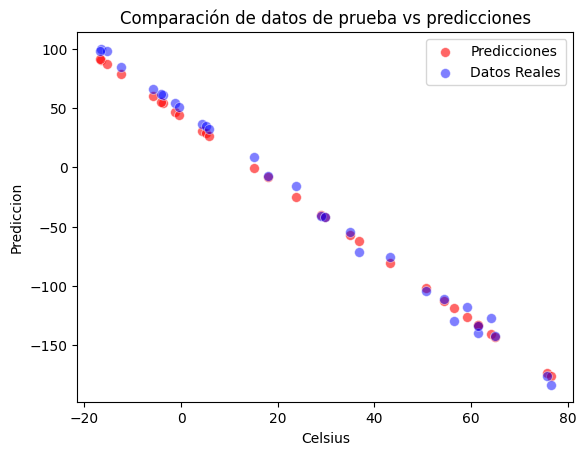

In [19]:
# Convertir a dimensiones apropiadas
x_test_flat = x_test.values.ravel() 
y_test_flat = y_test.values  
y_test_pred_flat = y_test_pred  

# Prepare the data for plotting
datos_grafica = {
    'Celsius': x_test_flat,  # Feature
    'Valks': y_test_flat,    # Actual target values
    'Prediccion': y_test_pred_flat  # Predicted target values
}

# Create a DataFrame from the data
test = pd.DataFrame(datos_grafica)

# Create scatter plots
sns.scatterplot(data=test, x='Celsius', y='Prediccion', color='red', label='Predicciones', alpha=0.6, s=50)
sns.scatterplot(data=test, x='Celsius', y='Valks', color='blue', label='Datos Reales', alpha=0.5, s=50)

# Add title and legend
plt.title('Comparación de datos de prueba vs predicciones')
plt.legend()

# Show the plot
plt.show()


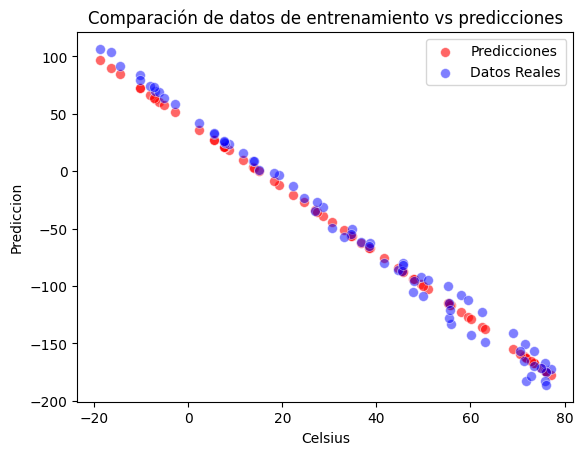

In [20]:
# Convert 2D arrays to 1D arrays
x_train_flat = x_train.values.ravel()  # or x_test.flatten()
y_train_flat = y_train.values  # or y_test.flatten()
y_train_pred_flat = y_train_pred  # or y_test_pred.flatten()

# Prepare the data for plotting
datos_grafica_2 = {
    'Celsius': x_train_flat,  # Feature
    'Valks': y_train_flat,    # Actual target values
    'Prediccion': y_train_pred_flat  # Predicted target values
}

# Create a DataFrame from the data
train = pd.DataFrame(datos_grafica_2)

# Create scatter plots
sns.scatterplot(data=train, x='Celsius', y='Prediccion', color='red', label='Predicciones', alpha=0.6, s=50)
sns.scatterplot(data=train, x='Celsius', y='Valks', color='blue', label='Datos Reales', alpha=0.5, s=50)

# Add title and legend
plt.title('Comparación de datos de entrenamiento vs predicciones')
plt.legend()

# Show the plot
plt.show()